# Brahmanand Singh
# @brahma19
Mobile Price Range classification using KNN.

Data description:
id:ID
battery_power:Total energy a battery can store in one time measured in mAh

blue:Has bluetooth or not

clock_speed:speed at which microprocessor executes instructions

dual_sim:Has dual sim support or not

fc:Front Camera mega pixels
four_g:Has 4G or not

int_memory:Internal Memory in Gigabytes
m_dep:Mobile Depth in cm

mobile_wt:Weight of mobile phone
n_cores:Number of cores of processor
pc:Primary Camera mega pixels

px_height:Pixel Resolution Height
px_width:Pixel Resolution Width
ram:Random Access Memory in Megabytes
sc_h:Screen Height of mobile in cm

sc_w:Screen Width of mobile in cm
talk_time:longest time that a single battery charge will last when you are
three_g:Has 3G or not

touch_screen:Has touch screen or not
wifi:Has wifi or not


In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

#read the train.csv , this will be then used for EDA and then training and testing the model
#test.csv will be used for prediction once we train the model using train.csv
df = pd.read_csv("~/Documents/codebase/data/train.csv")

In [15]:
#check the data types of the loaded fields
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [16]:
# Get the details of all the numeric fileds 
df.describe()
#count is 2k for each fields, there are no missing values

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [17]:
''' is any missing values across columns'''
df.isnull().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

There is no Missing value in the test dataset , now checking for duplicate values in the dataset

In [18]:
len(df)

2000

In [19]:
len(df.drop_duplicates())

2000

There are no exact duplicates in the dataset as length is same before and after removing the duplicates = 2k rows

In [20]:
# EDA
# get unique value for each field
df.apply(lambda col: ', '.join(map(str, col.unique())))
# No Missing Values in the data
# Few fields are having binary values, 1 or 0 these are category fields and we need to see whether they have any impact to the price_range category

battery_power    842, 1021, 563, 615, 1821, 1859, 1954, 1445, 5...
blue                                                          0, 1
clock_speed      2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, 1...
dual_sim                                                      0, 1
fc               1, 0, 2, 13, 3, 4, 5, 7, 11, 12, 16, 6, 15, 8,...
four_g                                                        0, 1
int_memory       7, 53, 41, 10, 44, 22, 24, 9, 33, 17, 52, 46, ...
m_dep             0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1.0, 0.3, 0.4, 0.2
mobile_wt        188, 136, 145, 131, 141, 164, 139, 187, 174, 9...
n_cores                                     2, 3, 5, 6, 1, 8, 4, 7
pc               2, 6, 9, 14, 7, 10, 0, 15, 1, 18, 17, 11, 16, ...
px_height        20, 905, 1263, 1216, 1208, 1004, 381, 512, 386...
px_width         756, 1988, 1716, 1786, 1212, 1654, 1018, 1149,...
ram              2549, 2631, 2603, 2769, 1411, 1067, 3220, 700,...
sc_h             9, 17, 11, 16, 8, 13, 19, 5, 14, 18, 7, 10, 1

In [ ]:
#price range is equally distributed , this is problem of balanced class classification
sns.countplot(x=df["price_range"])

In [21]:
#Get only the categorical fields and try to draw the pair plot
cat_dataset=df[['blue','dual_sim','three_g','four_g','wifi','touch_screen','price_range']]
cat_dataset.describe()

,blue,dual_sim,three_g,four_g,wifi,touch_screen,price_range
count,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.4950,0.509500,0.761500,0.521500,0.507000,0.503000,1.500000
std,0.5001,0.500035,0.426273,0.499662,0.500076,0.500116,1.118314
min,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.750000
50%,0.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000
75%,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,2.250000
max,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


# Above fields are categorical variable but provided as numeric value in the dataset, we can use correlation and plot the heatmap to see if they have any impact on the price_range

In [ ]:
#using correlation method as values are integer (binary)
corr = cat_dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
#Building pairpolot to see the distribution of the data with repect to price_range
sns.pairplot(df[['three_g','four_g','wifi','price_range']],hue="price_range")

In [ ]:
#Building pairpolot to see the distribution of the data with repect to price_range
sns.pairplot(df[['blue','touch_screen','dual_sim','price_range']],hue="price_range")

In [ ]:
#checking other features with respect to price_range category
sns.boxplot(x="price_range", y="battery_power", data=df)
#Battery power is directly linked with price range, more the battary power, more the price range

In [ ]:
#checking other features with respect to price_range category
sns.boxplot(x="price_range", y="ram", data=df)
#RAM is directly linked with price range, more the battary power, more the price range

In [ ]:
#checking other features with respect to price_range category
sns.boxplot(x="price_range", y="talk_time", data=df)
#we can not make much inference from talk_time and price_range

In [ ]:
#checking other features with respect to price_range category
sns.boxplot(x="price_range", y="pc", data=df)
#we can not make much inference from primary camera and price_range

In [ ]:
#Checking how the RAM size is affecting the price range
sns.jointplot(x='ram',y='price_range',data=df,color='blue',kind='kde');
#we can clearly see in the graph as RAM Size is directly related to price range.
#As the RAM size increase , mobile price range is moving up

Text(0.5, 0, 'MegaPixels')

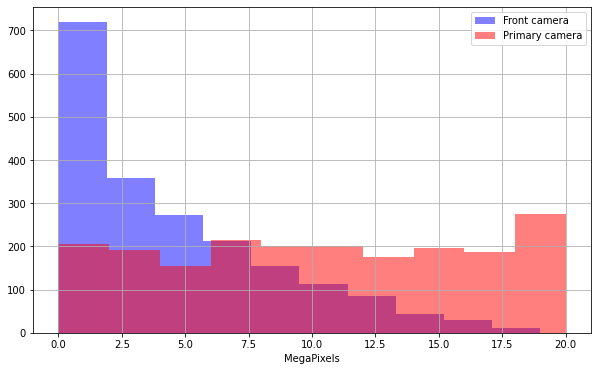

In [23]:
#Plotting the number of phones with front camera and Primary camera
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

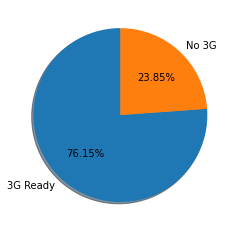

In [24]:
#% of Phones which support 3G 
labels = ["3G Ready",'No 3G']
values=df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.2f%%',shadow=True,startangle=90)
plt.show()

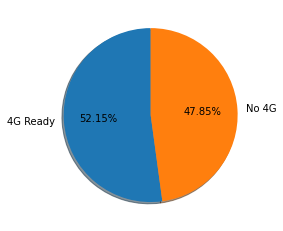

In [25]:
#% of Phones which support 4G 
labels = ["4G Ready",'No 4G']
values=df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.2f%%',shadow=True,startangle=90)
plt.show()

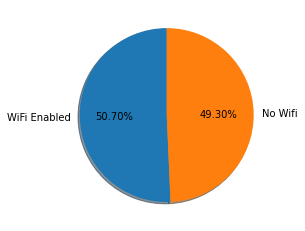

In [26]:
#WiFi phones in the sample
labels = ["WiFi Enabled",'No Wifi']
values=df['wifi'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.2f%%',shadow=True,startangle=90)
plt.show()

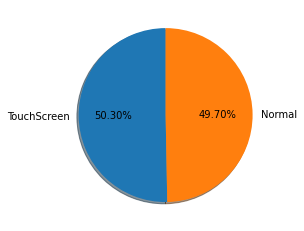

In [27]:
#WiFi phones in the sample
labels = ["TouchScreen",'Normal']
values=df['touch_screen'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.2f%%',shadow=True,startangle=90)
plt.show()

In [28]:
#now making the Independant and dependant variable set
X=df.drop('price_range',axis=1)

In [29]:
#dependent variables array
y=df['price_range']

In [30]:
#Splitting the test data for training the testing the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

#Since this is classification problem we are going to use K Nearest Neighbour Algorithm


In [31]:
#getting the optimum K value using elbow method
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

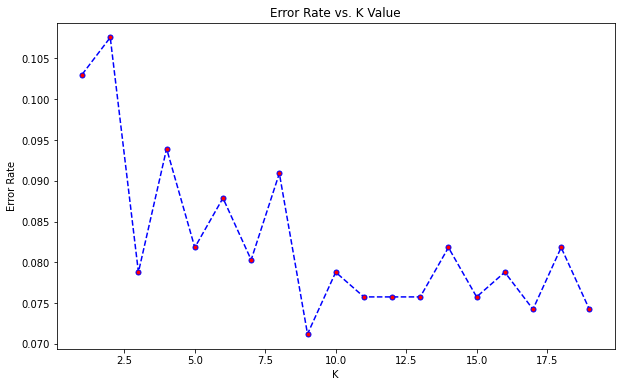

In [32]:
#plotting the grapth of error_rate vs K value
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the Graph it is clearly visible that Error rate is minimum between K 8 and 11

In [33]:
#using K=9 , find the accuracy of the model
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9287878787878788

In [34]:
#using K=11, find the accuracy of the model
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9242424242424242

K=9 is having accuracy of 92.87 % and K=11 is having accuracy of 92.42% , we are going to take K=9

In [35]:
#taking K=9 for best score
#using K=9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9287878787878788

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       158
           1       0.88      0.95      0.91       152
           2       0.93      0.86      0.90       199
           3       0.93      0.93      0.93       151

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



In [37]:
#confusion Matrix for KNN
matrix=confusion_matrix(y_test,pred)
print(matrix)
#from the confusion Matrix we can see that diagnols are high numbers meaning these are detected correctly

[[155   3   0   0]
 [  4 145   3   0]
 [  0  17 172  10]
 [  0   0  10 141]]


In [38]:
#Now we are going to use Test.csv file and run the model on that file and predict the price_range for the given input data
df_test=pd.read_csv('~/Documents/codebase/data/test.csv')

In [39]:
#Show sample data
df_test.head()


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


# We have Id field in the test data, need to to drop that as we need to pass the same number of input fields to the Model for which it is trained.

In [40]:
#drop the extra column from the dataset
df_test=df_test.drop('id',axis=1)

In [41]:
df_test.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [42]:
#Now passing this data to the Model and getting the prediction
pridicted_df=knn.predict(df_test)

In [43]:
# number of pridictions , 1000 rows are passed as input , we have got 1000 rows as output
pridicted_df.shape

(1000,)

In [44]:
#Adding the predicted value as "price_range" column to the test dataframe
df_test['price_range']=pridicted_df

In [45]:
#display the sample data with price_range field
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [46]:
#sumary of df_test dataset
df_test.describe()
#As we can see price_range is added to the test dataset for all 1K rows.

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,...,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000,1.518000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,...,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201,1.133561
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,...,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,...,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,...,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000,2.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,...,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000,3.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,...,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000,3.000000


In [48]:
#output of pridicted price range for the test data, input=1000 rows
df_test.groupby(['price_range'])['ram'].count().reset_index()

,price_range,ram
0,0,253
1,1,240
2,2,243
3,3,264


# We can conclude that for predicting the price_range on the given dataset we can use KNN algorithm with 92% accuracy and predict the price range of mobiles.

I have also tested the Model by removing some features e.g. category value like blue,wifi,dual_sim etc but that does seems to be impacting the model accuracy or output
